## FastText SkipGram

In [ ]:
import pandas as pd
import numpy as np
import gensim
import utils
import warnings
%matplotlib inline
import re  
import pandas as pd  
from time import time 
import seaborn as sns
import xgboost as xgb
import multiprocessing
import lightgbm as lgb
from utils import metrics
from utils import Normalizing
from utils import featureScore
from utils import folderPath
from utils import clean_dataset
from lightgbm import LGBMRegressor
from gensim.models import FastText
from sklearn import preprocessing
from gensim.models import Doc2Vec
from sklearn.manifold import TSNE
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
from utils import Feature_Extraction
from utils import removeColumnContainString
from sklearn.neural_network import MLPRegressor
from utils import hyperparameterTuning_MLP
from utils import plot_feature_importance
from utils import hyperparameterTuning_XGBoost
from utils import hyperparameterTuning_RandomForest
from sklearn.ensemble import RandomForestRegressor
from collections import defaultdict  # For word frequency
from sklearn.model_selection import train_test_split
cores = multiprocessing.cpu_count() # Count the number of cores in a computer
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path='/content/drive/MyDrive/NLP/'
df=pd.read_csv(path + '3.csv')

In [ ]:
df

,Unnamed: 0,caption,following,likes,posts_count,followers,caption_length,biography_length,po_co,pof,...,TextBlob_Subjectivity,TextBlob_Polarity,hashtags,hashcounts,mentions,mention_count,emoji,emoji_text,emoji_count,hashtag_popularity
0,0,last pizza sunday arch today pizzas available ...,352.0,29.0,280.0,8702.0,121,149.0,280.0,0.793201,...,0.233333,0.200000,NaN,0,NaN,0,"['🍕', '🍕', '🍕', '🥐', '🥐', '🥐']","'pizza', 'pizza', 'pizza', 'croissant', 'crois...",6,0.000000
1,1,new cakes counters,352.0,44.0,280.0,8702.0,28,149.0,280.0,0.793201,...,0.454545,0.136364,NaN,0,NaN,0,"['😋', '😋']","'face savoring food', 'face savoring food'",2,0.000000
2,2,opening times half term hi everyone wanted let...,352.0,209.0,280.0,8702.0,259,149.0,28.0,0.793201,...,0.147222,-0.080556,NaN,0,NaN,0,"['🔺', '🔺']","'red triangle pointed up', 'red triangle point...",2,0.000000
3,3,new addition selection sandwiches roasted aube...,352.0,95.0,280.0,8702.0,138,149.0,70.0,0.793201,...,0.477273,0.085227,NaN,0,NaN,0,[],NaN,0,0.000000
4,4,currently closed move new exciting space aroun...,352.0,101.0,280.0,8702.0,256,149.0,40.0,0.793201,...,0.444719,0.174416,"'#yeastbakery', '#eastlondon', '#eastlondonfoo...",4,NaN,0,[],NaN,0,18028.250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88509,88509,day 2 christmas ochure tour day one ochure tour #,579.0,10.0,1863.0,2321.0,278,150.0,931.5,3.212069,...,0.000000,0.000000,"'#sandysfishmongers', '#butcher', '#fishmonger...",20,NaN,0,[],NaN,0,10095.150000
88510,88510,NaN,579.0,50.0,1863.0,2321.0,35,150.0,1863.0,3.212069,...,0.000000,0.000000,"'#armisticeday', '#poppy', '#lestwerespect'",3,NaN,0,[],NaN,0,4333.666667
88511,88511,theres one turkey best place buy sandys make c...,579.0,8.0,1863.0,2321.0,266,150.0,1863.0,3.212069,...,0.525000,0.500000,"'#notjustafishmonger', '#butcher', '#fishmonge...",9,NaN,0,[],NaN,0,5195.444444
88512,88512,day one ochure tour #,579.0,9.0,1863.0,2321.0,241,150.0,1863.0,3.212069,...,0.000000,0.000000,"'#sandysfishmongers', '#butcher', '#fishmonger...",19,NaN,0,[],NaN,0,10504.315789


In [ ]:
df.drop(['Unnamed: 0'], axis = 1,inplace=True)

In [ ]:
tokenized_caption = df['caption'].apply(lambda x: str(x).split()) # tokenizing
modelFastTextSkipGramCaption = FastText(tokenized_caption, 
                     size=100, # desired no. of features/independent variables
                     window=2,  # context window size
                     min_count=2, # Ignores all words with total frequency lower than 2.  
                     workers=32, # no.of cores
                     hs = 0,
                     negative = 10, # for negative sampling
                     sg=1  # 1 for Skipgram model
                     )

modelFastTextSkipGramCaption.build_vocab(tokenized_caption, update=True)
modelFastTextSkipGramCaption.train(tokenized_caption, total_examples= len(tokenized_caption), epochs=20)

In [ ]:
modelFastTextSkipGramCaption.wv.most_similar("Gastroenteritis")

[('arthritis', 0.7127257585525513),
 ('osteoarthritis', 0.7120764851570129),
 ('gastrointestinal', 0.6904004216194153),
 ('colitis', 0.669417142868042),
 ('herniating', 0.6680669188499451),
 ('impulses', 0.6653196811676025),
 ('alstroemeria', 0.6634736061096191),
 ('gastropub', 0.6611387729644775),
 ('pingdemic', 0.6587487459182739),
 ('materialharvest', 0.6473618745803833)]

In [ ]:
modelFastTextSkipGramCaption.wv.most_similar("pizza")

[('pizza995', 0.8618265390396118),
 ('prepizza', 0.8222495317459106),
 ('pizzawe', 0.8170374631881714),
 ('pizzavegan', 0.814807653427124),
 ('pizzazz', 0.8137081861495972),
 ('pizzagarlic', 0.763439416885376),
 ('sharerpizza', 0.7626430988311768),
 ('pizzas', 0.748349666595459),
 ('pizzapoints', 0.741744875907898),
 ('atpizzatogo', 0.7364782691001892)]

In [ ]:
# modelFastTextSkipGramCaption.save(path+ "Save Models\\200_fastText_Skipgram_Caption.model")

In [ ]:
def word_vector(tokens, size,model):
    vec = np.zeros(size).reshape((1, size))
    count = 0
    for word in tokens:
        try:
            vec += model[word].reshape((1, size))
            count += 1.
        except KeyError:
            continue
    if count != 0:
        vec /= count
    return vec

In [ ]:
wordvec_arrays = np.zeros((len(tokenized_caption), 100)) 
for i in range(len(tokenized_caption)):
    wordvec_arrays[i,:] = word_vector(tokenized_caption[i], 100,modelFastTextSkipGramCaption)
wordvec_caption = pd.DataFrame(wordvec_arrays)
wordvec_caption.shape

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


(88514, 100)

In [ ]:
wordvec_caption.shape

(88514, 100)

### Hashtags

In [ ]:
tokenized_hastags = df['hashtags'].apply(lambda x: str(x).split()) # tokenizing
modelFastTextSkipGramHastags = FastText(tokenized_hastags, 
                     size=100, # desired no. of features/independent variables
                     window=2,  # context window size
                     min_count=2, # Ignores all words with total frequency lower than 2.  
                     workers=32, # no.of cores
                     hs = 0,
                     negative = 10, # for negative sampling
                     sg=1  # 1 for Skipgram model
                     )

modelFastTextSkipGramHastags.build_vocab(tokenized_hastags, update=True)
modelFastTextSkipGramHastags.train(tokenized_hastags, total_examples= len(tokenized_hastags), epochs=20)

In [ ]:
modelFastTextSkipGramHastags.wv.most_similar("Gastroenteritis")

[("'#quintessentiallybritish',", 0.7056427001953125),
 ("'#greatbritishmenu',", 0.6941958665847778),
 ("'#quintessentiallybritish'", 0.6930575370788574),
 ("'#greatbritishmenu'", 0.6929190754890442),
 ("'#britishcuisineatitsfinest',", 0.6811676621437073),
 ("'#britishcuisinefinedining',", 0.6702631115913391),
 ("'#britishcharcuterie',", 0.6669270992279053),
 ("'#britishproduce',", 0.6520909070968628),
 ("'#reclaimedinteriors',", 0.64862060546875),
 ("'#britishopenbjj',", 0.6477285623550415)]

In [ ]:
# modelFastTextSkipGramHastags.save(path+ "Save Models\\200_fastText_Skipgram_Hashtags.model")

In [ ]:
wordvec_arrays = np.zeros((len(tokenized_hastags), 100)) 
for i in range(len(tokenized_hastags)):
    wordvec_arrays[i,:] = word_vector(tokenized_hastags[i], 100,modelFastTextSkipGramHastags)
wordvec_Hashtag = pd.DataFrame(wordvec_arrays)
wordvec_Hashtag.shape

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


(88514, 100)

### emoji Text

In [ ]:
tokenized_emojiText = df['hashtags'].apply(lambda x: str(x).split()) # tokenizing
modelFastTextSkipGramEmojiText = FastText(tokenized_emojiText, 
                     size=100, # desired no. of features/independent variables
                     window=2,  # context window size
                     min_count=2, # Ignores all words with total frequency lower than 2.  
                     workers=32, # no.of cores
                     hs = 0,
                     negative = 10, # for negative sampling
                     sg=1  # 1 for Skipgram model
                     )

modelFastTextSkipGramEmojiText.build_vocab(tokenized_emojiText, update=True)
modelFastTextSkipGramEmojiText.train(tokenized_emojiText, total_examples= len(tokenized_emojiText), epochs=20)

In [ ]:
modelFastTextSkipGramEmojiText.wv.most_similar("Gastroenteritis")

[("'#greatbritishmenu',", 0.6999468207359314),
 ("'#greatbritishmenu'", 0.6988459825515747),
 ("'#quintessentiallybritish',", 0.6785581111907959),
 ("'#britishproduce',", 0.6709098815917969),
 ("'#britishcharcuterie',", 0.6641860008239746),
 ("'#quintessentiallybritish'", 0.6636502742767334),
 ("'#bespokeinteriors',", 0.6631288528442383),
 ("'#reclaimedinteriors',", 0.6609504222869873),
 ("'#gastropub'", 0.6595735549926758),
 ("'#britishcuisinefinedining',", 0.6595348119735718)]

In [ ]:
wordvec_arrays = np.zeros((len(tokenized_emojiText), 100)) 
for i in range(len(tokenized_emojiText)):
    wordvec_arrays[i,:] = word_vector(tokenized_emojiText[i], 100,modelFastTextSkipGramEmojiText)
wordvec_emojiText = pd.DataFrame(wordvec_arrays)
wordvec_emojiText.shape

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


(88514, 100)

## mentions

In [ ]:
tokenized_mentions = df['mentions'].apply(lambda x: str(x).split()) # tokenizing
modelFastTextSkipGramMentions = FastText(tokenized_mentions, 
                     size=100, # desired no. of features/independent variables
                     window=2,  # context window size
                     min_count=2, # Ignores all words with total frequency lower than 2.  
                     workers=32, # no.of cores
                     hs = 0,
                     negative = 10, # for negative sampling
                     sg=1  # 1 for Skipgram model
                     )

modelFastTextSkipGramMentions.build_vocab(tokenized_mentions, update=True)
modelFastTextSkipGramMentions.train(tokenized_mentions, total_examples= len(tokenized_mentions), epochs=20)

In [ ]:
modelFastTextSkipGramMentions.wv.most_similar("Gastroenteritis")

[("'@crossfitrivermersey'", 0.982772946357727),
 ("'@crossfitberserk',", 0.9820277690887451),
 ("'@crossfitancoats',", 0.9816701412200928),
 ("'@crossfitleicester'", 0.9814744591712952),
 ("'@crossfituk'", 0.9812914729118347),
 ("'@crossfitrivermersey',", 0.9812374711036682),
 ("'@crossfitaffiliates'", 0.9798704981803894),
 ("'@crossfittraining'", 0.9792039394378662),
 ("'@crossfitnottinghamltd'", 0.9787640571594238),
 ("'@crossfit_trainmanchester',", 0.9787311553955078)]

In [ ]:
# modelFastTextSkipGramMentions.save(path+ "Save Models\\200_fastText_Skipgram_Hashtags.model")

In [ ]:
wordvec_arrays = np.zeros((len(tokenized_mentions), 100)) 
for i in range(len(tokenized_mentions)):
    wordvec_arrays[i,:] = word_vector(tokenized_mentions[i], 100,modelFastTextSkipGramMentions)
wordvec_Mentions = pd.DataFrame(wordvec_arrays)
wordvec_Mentions.shape

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


(88514, 100)

In [ ]:
fastText_Df = pd.DataFrame(np.hstack((wordvec_caption,wordvec_Hashtag,wordvec_emojiText, wordvec_Mentions,df)))

In [ ]:
fastText_Df

,0,1,2,3,4,5,6,7,8,9,...,435,436,437,438,439,440,441,442,443,444
0,0.342737,0.148571,0.365808,0.026035,0.392382,0.381604,0.178445,0.140325,0.168297,0.280773,...,0.233333,0.2,NaN,0,NaN,0,"['🍕', '🍕', '🍕', '🥐', '🥐', '🥐']","'pizza', 'pizza', 'pizza', 'croissant', 'crois...",6,0.0
1,0.116151,0.319405,0.565757,0.117405,0.418955,0.14302,-0.178255,0.508806,0.340587,0.005181,...,0.454545,0.136364,NaN,0,NaN,0,"['😋', '😋']","'face savoring food', 'face savoring food'",2,0.0
2,0.277187,0.380307,0.525926,-0.029037,0.308093,0.172014,0.070683,0.175229,0.194634,0.416222,...,0.147222,-0.080556,NaN,0,NaN,0,"['🔺', '🔺']","'red triangle pointed up', 'red triangle point...",2,0.0
3,0.326856,0.332618,0.436246,0.171354,0.417733,0.761593,0.054292,0.333202,0.286622,0.632933,...,0.477273,0.085227,NaN,0,NaN,0,[],NaN,0,0.0
4,0.101571,0.11116,0.607095,-0.002451,0.419107,0.088415,0.174713,0.194156,0.222113,0.283386,...,0.444719,0.174416,"'#yeastbakery', '#eastlondon', '#eastlondonfoo...",4,NaN,0,[],NaN,0,18028.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88509,0.480873,0.252823,0.100821,-0.001579,0.24003,0.290579,0.233147,0.091879,0.152616,0.224119,...,0.0,0.0,"'#sandysfishmongers', '#butcher', '#fishmonger...",20,NaN,0,[],NaN,0,10095.15
88510,-0.018325,0.438883,0.486155,-0.01287,-0.152962,0.957115,-0.555048,0.049417,0.227761,0.935689,...,0.0,0.0,"'#armisticeday', '#poppy', '#lestwerespect'",3,NaN,0,[],NaN,0,4333.666667
88511,0.237195,0.046514,0.401197,0.120827,0.123898,0.292681,0.005688,0.148975,0.010788,0.315009,...,0.525,0.5,"'#notjustafishmonger', '#butcher', '#fishmonge...",9,NaN,0,[],NaN,0,5195.444444
88512,0.44193,0.232633,0.079918,0.065881,0.317436,0.305606,0.15909,0.051181,0.135487,0.215616,...,0.0,0.0,"'#sandysfishmongers', '#butcher', '#fishmonger...",19,NaN,0,[],NaN,0,10504.315789


In [ ]:
# fastText_Df[402]

In [ ]:
print(len(fastText_Df.columns))
a=len(fastText_Df.columns)-43
print(a)
fastText_Df[len(fastText_Df.columns)-43]
fastText_Df.rename(columns = {a:'likes'}, inplace = True)
df=utils.removeColumnContainString(fastText_Df)

445
402
Couldn't covert 400 to float
Couldn't covert 437 to float
Couldn't covert 439 to float
Couldn't covert 441 to float
Couldn't covert 442 to float


In [ ]:
df = pd.DataFrame(df)
data=df.astype(str)

normalizer = preprocessing.MinMaxScaler(feature_range=(0, 1))
normalized_df = pd.DataFrame(normalizer.fit_transform(data),  columns = data.columns)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


In [ ]:
# dropped = [200,223,225,227,228]
# fastText_df = fastText_Df.drop(dropped,axis=1)
# fastText_df

In [ ]:
clean_dataset(normalized_df)

,0,1,2,3,4,5,6,7,8,9,...,431,432,433,434,435,436,438,440,443,444
0,0.536734,0.424597,0.383493,0.402008,0.530243,0.427007,0.538817,0.510932,0.506330,0.464065,...,0.0,0.0,0.0,1.0,0.233333,0.600000,0.000000,0.0,0.041379,0.000000
1,0.457531,0.503977,0.459841,0.440046,0.539988,0.345397,0.385275,0.668275,0.592430,0.327439,...,1.0,0.0,0.0,0.0,0.454545,0.568182,0.000000,0.0,0.013793,0.000000
2,0.513821,0.532275,0.444632,0.379082,0.499331,0.355315,0.492431,0.525836,0.519492,0.531214,...,0.0,0.0,0.0,0.0,0.147222,0.459722,0.000000,0.0,0.013793,0.000000
3,0.531183,0.510117,0.410389,0.462505,0.539540,0.556987,0.485375,0.593291,0.565462,0.638649,...,0.0,1.0,0.0,0.0,0.477273,0.542614,0.000000,0.0,0.000000,0.000000
4,0.452435,0.407214,0.475625,0.390149,0.540044,0.326719,0.537211,0.533918,0.533224,0.465360,...,1.0,0.0,0.0,0.0,0.444719,0.587208,0.051948,0.0,0.000000,0.031080
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88509,0.585020,0.473039,0.282312,0.390512,0.474369,0.395871,0.562364,0.490246,0.498494,0.435978,...,0.0,1.0,0.0,0.0,0.000000,0.500000,0.259740,0.0,0.000000,0.017404
88510,0.410525,0.559493,0.429446,0.385812,0.330244,0.623868,0.223082,0.472114,0.536047,0.788741,...,1.0,0.0,0.0,0.0,0.000000,0.500000,0.038961,0.0,0.000000,0.007471
88511,0.499842,0.377176,0.397006,0.441471,0.431779,0.396590,0.464453,0.514626,0.427617,0.481037,...,0.0,0.0,0.0,0.0,0.525000,0.750000,0.116883,0.0,0.000000,0.008957
88512,0.571407,0.463658,0.274331,0.418597,0.502757,0.401011,0.530486,0.472867,0.489934,0.431763,...,0.0,0.0,0.0,0.0,0.000000,0.500000,0.246753,0.0,0.000000,0.018109


In [ ]:
y=normalized_df['likes']                #Target Variable 
X = normalized_df.drop('likes', axis=1) #Feature Matrix 

In [ ]:
x_train_fastText_df, x_test_fastText_df, y_train_fastText_df, y_test_fastText_df = train_test_split(X, y, test_size=0.2)

### LightGBM

In [ ]:
dict_info = {'Model': [], 'RMSE': [], 'R2': [],'MAE': [], 'RMSLE': [],'max_error_':[]}

In [ ]:
model_lgb = LGBMRegressor(colsample_bytree=0.8,learning_rate=0.01, max_depth=8,min_child_weight=1, min_split_gain=0.0222415, n_estimators=35000,num_leaves=966, reg_alpha=0.04, reg_lambda=0.073,subsample=0.6)
# start = datetime.datetime.now()
lgbm = model_lgb.fit(x_train_fastText_df, y_train_fastText_df,eval_set=[(x_train_fastText_df, y_train_fastText_df), (x_test_fastText_df, y_test_fastText_df)],eval_metric ='mae')
# end = datetime.datetime.now()
# end-start

Streaming output truncated to the last 5000 lines.
[30001]	training's l2: 5.8556e-05	training's l1: 0.00174938	valid_1's l2: 5.08578e-05	valid_1's l1: 0.00185802
[30002]	training's l2: 5.8556e-05	training's l1: 0.00174938	valid_1's l2: 5.08578e-05	valid_1's l1: 0.00185802
[30003]	training's l2: 5.8556e-05	training's l1: 0.00174938	valid_1's l2: 5.08578e-05	valid_1's l1: 0.00185802
[30004]	training's l2: 5.8556e-05	training's l1: 0.00174938	valid_1's l2: 5.08578e-05	valid_1's l1: 0.00185802
[30005]	training's l2: 5.8556e-05	training's l1: 0.00174938	valid_1's l2: 5.08578e-05	valid_1's l1: 0.00185802
[30006]	training's l2: 5.8556e-05	training's l1: 0.00174938	valid_1's l2: 5.08578e-05	valid_1's l1: 0.00185802
[30007]	training's l2: 5.8556e-05	training's l1: 0.00174938	valid_1's l2: 5.08578e-05	valid_1's l1: 0.00185802
[30008]	training's l2: 5.8556e-05	training's l1: 0.00174938	valid_1's l2: 5.08578e-05	valid_1's l1: 0.00185802
[30009]	training's l2: 5.8556e-05	training's l1: 0.00174938	v

In [ ]:
y_pred_lgbm = lgbm.predict(x_test_fastText_df)
lgbm.score(x_test_fastText_df, y_test_fastText_df)

0.6056689618751495

In [ ]:
rmse,R2,MAE,MSE,RMSLE,max_error_= metrics(y_test_fastText_df,y_pred_lgbm)

dict_info['Model'].append('Lightgbm')
dict_info['RMSE'].append(rmse)
dict_info['R2'].append(R2)
dict_info['MAE'].append(MAE)
dict_info['RMSLE'].append(RMSLE)
dict_info['max_error_'].append(max_error_)

###Xgboost

In [ ]:
# utils.hyperparameterTuning_XGBoost(x_train_w2v_df,y_train_w2v_df)
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.7, learning_rate = 0.03,max_depth = 5, min_child_weight=4,nthread = 4, n_estimators = 500,subsample=0.7)
xg_reg.fit(x_train_fastText_df, y_train_fastText_df)
y_pred = xg_reg.predict(x_test_fastText_df)

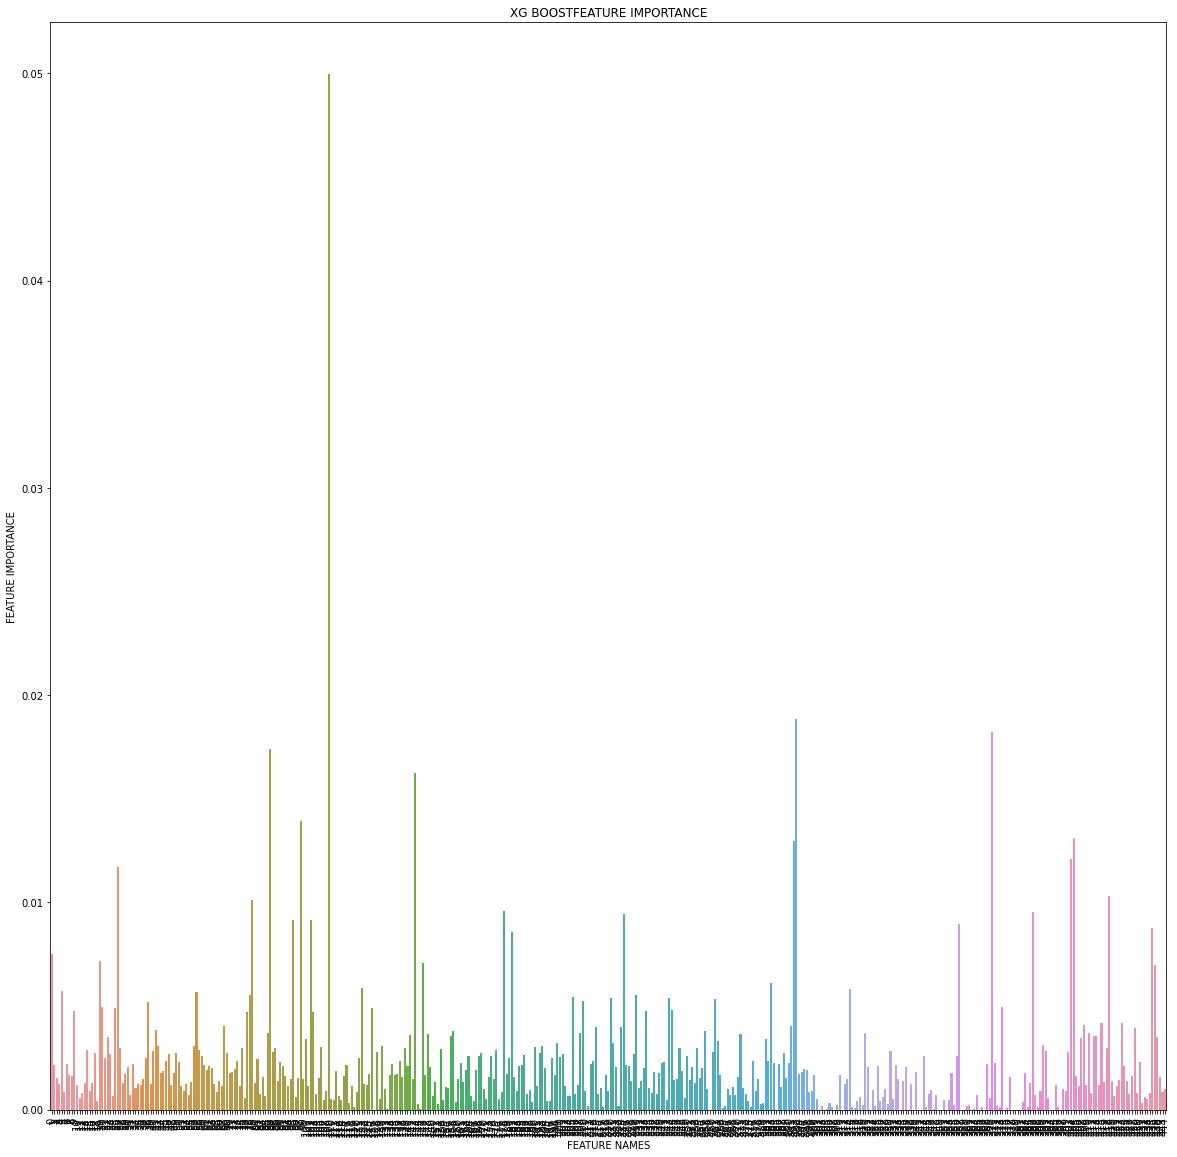

In [ ]:
plot_feature_importance(xg_reg.feature_importances_,x_train_fastText_df.columns,'XG BOOST')

In [ ]:
featureScore(xg_reg.feature_importances_)

Feature: 0, Score: 0.00749
Feature: 1, Score: 0.00215
Feature: 2, Score: 0.00151
Feature: 3, Score: 0.00122
Feature: 4, Score: 0.00571
Feature: 5, Score: 0.00083
Feature: 6, Score: 0.00219
Feature: 7, Score: 0.00169
Feature: 8, Score: 0.00163
Feature: 9, Score: 0.00474
Feature: 10, Score: 0.00118
Feature: 11, Score: 0.00056
Feature: 12, Score: 0.00081
Feature: 13, Score: 0.00127
Feature: 14, Score: 0.00286
Feature: 15, Score: 0.00089
Feature: 16, Score: 0.00130
Feature: 17, Score: 0.00272
Feature: 18, Score: 0.00041
Feature: 19, Score: 0.00719
Feature: 20, Score: 0.00497
Feature: 21, Score: 0.00251
Feature: 22, Score: 0.00349
Feature: 23, Score: 0.00269
Feature: 24, Score: 0.00066
Feature: 25, Score: 0.00488
Feature: 26, Score: 0.01171
Feature: 27, Score: 0.00300
Feature: 28, Score: 0.00130
Feature: 29, Score: 0.00171
Feature: 30, Score: 0.00207
Feature: 31, Score: 0.00073
Feature: 32, Score: 0.00221
Feature: 33, Score: 0.00105
Feature: 34, Score: 0.00123
Feature: 35, Score: 0.00119
Fe

In [ ]:
rmse,R2,MAE,MSE,RMSLE,max_error_= metrics(y_test_fastText_df,y_pred)

dict_info['Model'].append('XGboost')
dict_info['RMSE'].append(rmse)
dict_info['R2'].append(R2)
dict_info['MAE'].append(MAE)
dict_info['RMSLE'].append(RMSLE)
dict_info['max_error_'].append(max_error_)

### Random Forest

In [ ]:
# utils.hyperparameterTuning_RandomForest(x_train_fastText_df,y_train_fastText_df)
rnd_clf = RandomForestRegressor(n_estimators=20, min_samples_split=10, min_samples_leaf=4,max_features='sqrt',max_depth=10,bootstrap=True)
rnd_clf.fit(x_train_fastText_df, y_train_fastText_df)
y_pred_fastText_rnd = rnd_clf.predict(x_test_fastText_df)

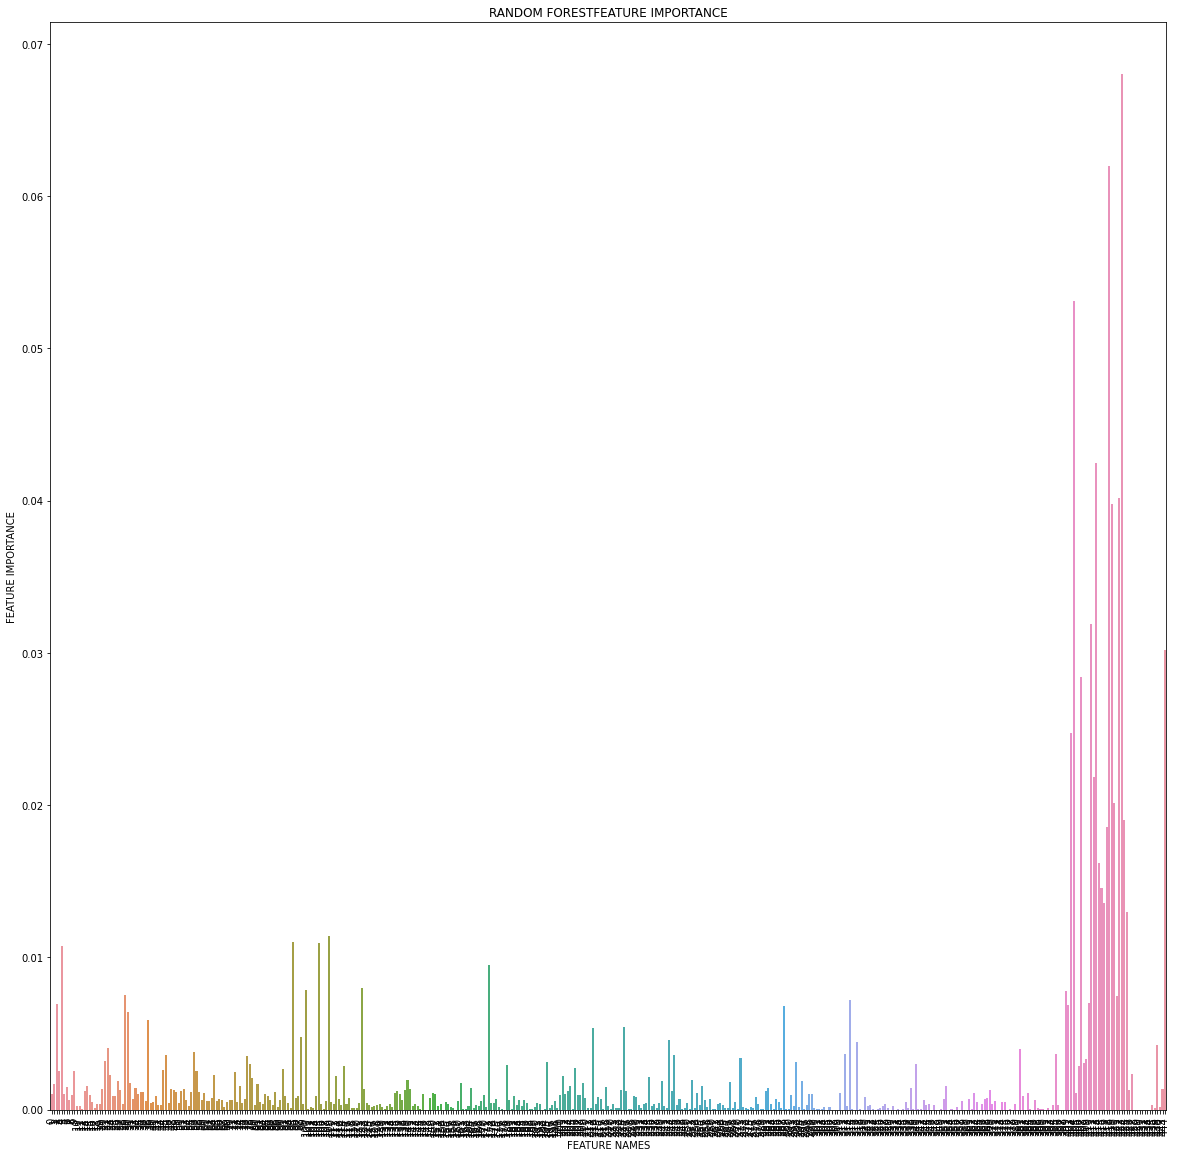

In [ ]:
plot_feature_importance(rnd_clf.feature_importances_,x_train_fastText_df.columns,'RANDOM FOREST')

In [ ]:
rmse,R2,MAE,MSE,RMSLE,max_error_= metrics(y_test_fastText_df,y_pred_fastText_rnd)

dict_info['Model'].append('Random Forest')
dict_info['RMSE'].append(rmse)
dict_info['R2'].append(R2)
dict_info['MAE'].append(MAE)
dict_info['RMSLE'].append(RMSLE)
dict_info['max_error_'].append(max_error_)

### MLP

In [ ]:
mlp_GS = MLPRegressor(activation='relu',alpha=0.001,hidden_layer_sizes=(50, 50, 50),learning_rate='constant',solver='adam')
mlp_GS.fit(x_train_fastText_df, y_train_fastText_df)
y_pred_fastText_mlp = mlp_GS.predict(x_test_fastText_df)

In [ ]:
rmse,R2,MAE,MSE,RMSLE,max_error_= metrics(y_test_fastText_df,y_pred_fastText_mlp)

dict_info['Model'].append('MLP')
dict_info['RMSE'].append(rmse)
dict_info['R2'].append(R2)
dict_info['MAE'].append(MAE)
dict_info['RMSLE'].append(RMSLE)
dict_info['max_error_'].append(max_error_)

### SVM

In [ ]:
from sklearn.svm import LinearSVR
svr= LinearSVR(C=1.0, dual=True, epsilon=1.5, fit_intercept=True,intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,tol=0.0001, verbose=0)
svr.fit(x_train_fastText_df, y_train_fastText_df)
y_pred_fastText_SVR = svr.predict(x_test_fastText_df)

In [ ]:
rmse,R2,MAE,MSE,RMSLE,max_error_= metrics(y_test_fastText_df,y_pred_fastText_SVR)

dict_info['Model'].append('SVR')
dict_info['RMSE'].append(rmse)
dict_info['R2'].append(R2)
dict_info['MAE'].append(MAE)
dict_info['RMSLE'].append(RMSLE)
dict_info['max_error_'].append(max_error_)

In [ ]:
dfData = pd.DataFrame(dict_info)
dfData

,Model,RMSE,R2,MAE,RMSLE,max_error_
0,Lightgbm,0.007131,0.605669,0.001858,-4.943238,0.197807
1,XGboost,0.006502,0.672172,0.001472,-5.035589,0.183032
2,Random Forest,0.006998,0.620265,0.001717,-4.962097,0.204303
3,MLP,0.008891,0.387016,0.003318,-4.722665,0.290263
4,SVR,0.011823,-0.083904,0.003290,-4.437672,0.363963
